In [71]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
# from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc

In [72]:
data = pd.read_csv(r"C:\Users\Asus\Downloads\corona_tested_006.csv")
data.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_30400\1183629769.py:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\Asus\Downloads\corona_tested_006.csv")


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [73]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)

No of row =  278848
No of col =  11


In [74]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [75]:
data = data.dropna()

In [76]:
#convert al the adata types into boolean
data['Cough_symptoms'] = data['Cough_symptoms'].astype('bool')
data['Fever'] = data['Fever'].astype('bool')
data['Sore_throat'] = data['Sore_throat'].astype('bool')
data['Shortness_of_breath'] = data['Shortness_of_breath'].astype('bool')
data['Headache'] = data['Headache'].astype('bool')


In [77]:
# data.describe()
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,True,False,False,False,False,negative,No,male,Abroad
13728,13729,22-03-2020,True,False,False,False,False,negative,No,female,Abroad
13730,13731,22-03-2020,True,True,False,False,False,positive,Yes,female,Other
13731,13732,22-03-2020,False,False,False,False,False,other,No,female,Other
13732,13733,22-03-2020,False,False,False,False,False,other,No,female,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,14-04-2020,True,False,True,False,False,negative,Yes,male,Abroad
156036,156037,14-04-2020,True,False,True,True,False,negative,No,male,Abroad
156037,156038,14-04-2020,True,True,False,False,False,negative,No,female,Abroad
156038,156039,14-04-2020,False,False,False,False,False,negative,No,male,Other


In [78]:
#checking for the balace of data
print(len(data[data['Corona'] == 'other']))
print(len(data[data['Corona'] == 'negative']))
print(len(data[data['Corona'] == 'positive']))

1878
125668
10626


In [79]:
data = data[data['Corona'] != 'other']
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,13728,22-03-2020,True,False,False,False,False,negative,No,male,Abroad
13728,13729,22-03-2020,True,False,False,False,False,negative,No,female,Abroad
13730,13731,22-03-2020,True,True,False,False,False,positive,Yes,female,Other
13734,13735,22-03-2020,False,False,False,False,False,negative,No,male,Other
13735,13736,22-03-2020,False,False,False,False,False,negative,No,female,Other
...,...,...,...,...,...,...,...,...,...,...,...
156035,156036,14-04-2020,True,False,True,False,False,negative,Yes,male,Abroad
156036,156037,14-04-2020,True,False,True,True,False,negative,No,male,Abroad
156037,156038,14-04-2020,True,True,False,False,False,negative,No,female,Abroad
156038,156039,14-04-2020,False,False,False,False,False,negative,No,male,Other


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136294 entries, 13727 to 156039
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               136294 non-null  int64 
 1   Test_date            136294 non-null  object
 2   Cough_symptoms       136294 non-null  bool  
 3   Fever                136294 non-null  bool  
 4   Sore_throat          136294 non-null  bool  
 5   Shortness_of_breath  136294 non-null  bool  
 6   Headache             136294 non-null  bool  
 7   Corona               136294 non-null  object
 8   Age_60_above         136294 non-null  object
 9   Sex                  136294 non-null  object
 10  Known_contact        136294 non-null  object
dtypes: bool(5), int64(1), object(5)
memory usage: 7.9+ MB


In [81]:
#dropping the second column i.e. date column which isnot essential while training the model
data = data.iloc[:,2:]

In [82]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,True,False,False,False,False,negative,No,male,Abroad
13728,True,False,False,False,False,negative,No,female,Abroad
13730,True,True,False,False,False,positive,Yes,female,Other
13734,False,False,False,False,False,negative,No,male,Other
13735,False,False,False,False,False,negative,No,female,Other
...,...,...,...,...,...,...,...,...,...
156035,True,False,True,False,False,negative,Yes,male,Abroad
156036,True,False,True,True,False,negative,No,male,Abroad
156037,True,True,False,False,False,negative,No,female,Abroad
156038,False,False,False,False,False,negative,No,male,Other


In [83]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

data["Age_60_above"] = ord_enc.fit_transform(data[["Age_60_above"]]).astype('int')
data["Sex"] = ord_enc.fit_transform(data[["Sex"]]).astype('int')
data["Known_contact"] = ord_enc.fit_transform(data[["Known_contact"]]).astype('int')
data["Corona"] = ord_enc.fit_transform(data[["Corona"]]).astype('int')


In [84]:
data


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13727,True,False,False,False,False,0,0,1,0
13728,True,False,False,False,False,0,0,0,0
13730,True,True,False,False,False,1,1,0,2
13734,False,False,False,False,False,0,0,1,2
13735,False,False,False,False,False,0,0,0,2
...,...,...,...,...,...,...,...,...,...
156035,True,False,True,False,False,0,1,1,0
156036,True,False,True,True,False,0,0,1,0
156037,True,True,False,False,False,0,0,0,0
156038,False,False,False,False,False,0,0,1,2


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136294 entries, 13727 to 156039
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Cough_symptoms       136294 non-null  bool 
 1   Fever                136294 non-null  bool 
 2   Sore_throat          136294 non-null  bool 
 3   Shortness_of_breath  136294 non-null  bool 
 4   Headache             136294 non-null  bool 
 5   Corona               136294 non-null  int32
 6   Age_60_above         136294 non-null  int32
 7   Sex                  136294 non-null  int32
 8   Known_contact        136294 non-null  int32
dtypes: bool(5), int32(4)
memory usage: 3.8 MB


In [87]:
#number of positive and negative sases are made equal inorder to reduce biaseness, since we have more dataser we're taking 10k positive and negative
df1 = data[data['Corona'] == 1]
df2 = data[data['Corona'] == 0].iloc[0:10626]
print(len(df1))
data = pd.concat([df1,df2])
print(len(df2))

10626
10626


In [88]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
13730,True,True,False,False,False,1,1,0,2
13748,True,True,False,False,False,1,1,1,0
13752,True,True,False,False,False,1,1,1,1
13765,True,True,False,False,False,1,0,1,1
13768,True,False,False,True,False,1,0,0,1
...,...,...,...,...,...,...,...,...,...
25815,False,False,False,False,False,0,0,1,2
25816,False,False,False,False,False,0,0,1,2
25817,False,False,False,False,False,0,0,1,2
25818,False,False,False,False,False,0,0,0,2


In [92]:
#since the data seems to be ordered, we fraction them for randomness(run this cell multiple times to suffle more)
data = data.sample(frac = 1)
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
36610,False,True,False,False,True,1,0,0,2
151872,True,False,False,False,False,1,0,1,1
51532,False,False,False,False,False,1,1,1,0
15343,False,False,False,False,False,0,0,1,2
21383,False,False,False,False,False,0,0,1,2
...,...,...,...,...,...,...,...,...,...
150021,False,False,False,False,False,1,0,1,1
64030,True,True,False,False,False,1,0,1,2
23807,False,False,False,False,False,0,0,1,2
25676,False,False,False,False,False,0,0,1,2


In [94]:
data.corr()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
Cough_symptoms,1.000000,0.400116,0.172939,0.167572,0.183600,0.302354,-0.004941,0.042728,-0.400468
Fever,0.400116,1.000000,0.152964,0.170466,0.233707,0.389041,0.067895,0.090105,-0.211166
Sore_throat,0.172939,0.152964,1.000000,0.156534,0.292422,0.256021,-0.028166,-0.025874,-0.083448
Shortness_of_breath,0.167572,0.170466,0.156534,1.000000,0.172170,0.213043,0.037000,0.007237,-0.062398
Headache,0.183600,0.233707,0.292422,0.172170,1.000000,0.318287,-0.040057,-0.005286,-0.103813
Corona,0.302354,0.389041,0.256021,0.213043,0.318287,1.000000,0.060173,0.096052,-0.299333
Age_60_above,-0.004941,0.067895,-0.028166,0.037000,-0.040057,0.060173,1.000000,0.000672,0.042194
Sex,0.042728,0.090105,-0.025874,0.007237,-0.005286,0.096052,0.000672,1.000000,-0.004837
Known_contact,-0.400468,-0.211166,-0.083448,-0.062398,-0.103813,-0.299333,0.042194,-0.004837,1.000000


In [96]:
data = data.drop(columns=['Age_60_above'])

In [97]:
data

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
36610,False,True,False,False,True,1,0,2
151872,True,False,False,False,False,1,1,1
51532,False,False,False,False,False,1,1,0
15343,False,False,False,False,False,0,1,2
21383,False,False,False,False,False,0,1,2
...,...,...,...,...,...,...,...,...
150021,False,False,False,False,False,1,1,1
64030,True,True,False,False,False,1,1,2
23807,False,False,False,False,False,0,1,2
25676,False,False,False,False,False,0,1,2


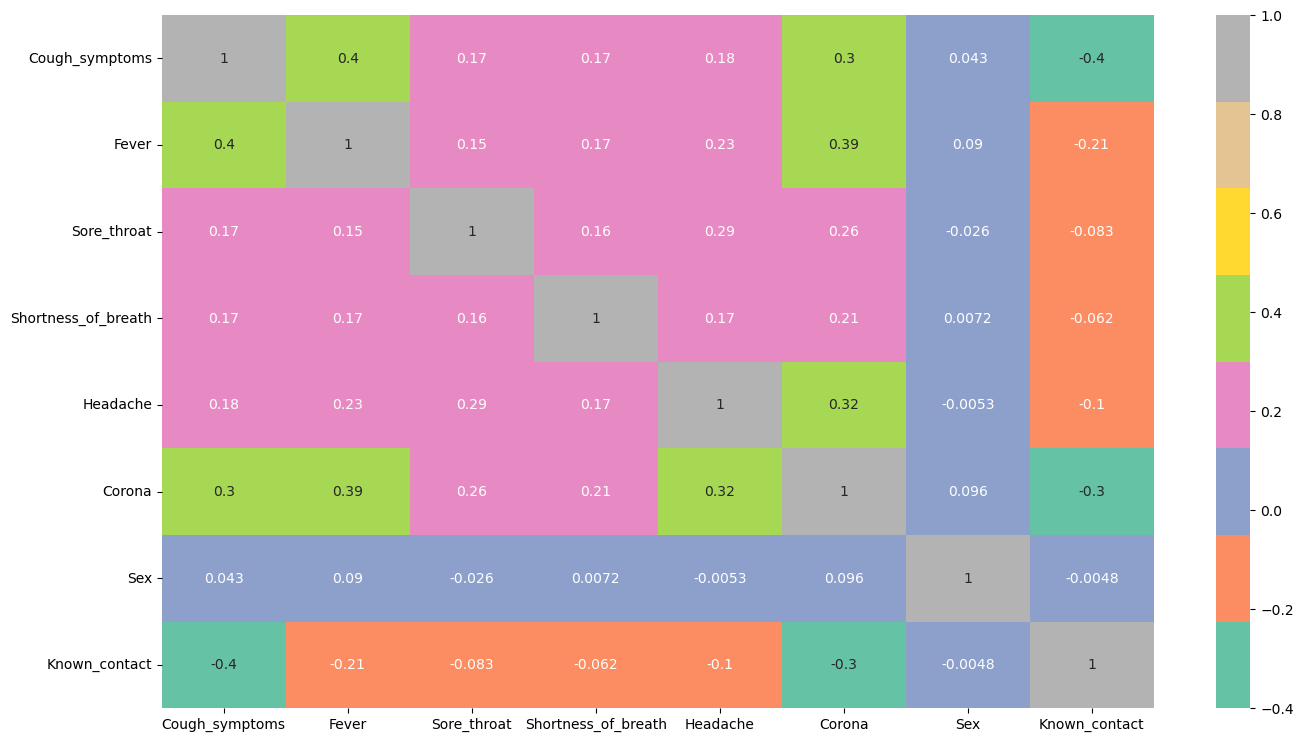

In [98]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()

In [99]:
data.columns

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona', 'Sex', 'Known_contact'],
      dtype='object')

In [100]:
# training and normalization of data
X = data[['Cough_symptoms', 'Fever','Sore_throat', 'Shortness_of_breath', 'Headache', 'Known_contact']]
Y = data['Corona']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

In [101]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)


SVC()

In [102]:
X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Known_contact
97773,True,False,False,False,False,1
18633,False,False,False,False,False,2
29999,True,True,False,True,False,2
16277,False,False,False,False,False,2
65242,True,False,False,False,False,1
...,...,...,...,...,...,...
75340,True,False,False,False,False,2
18940,True,False,False,False,False,0
17329,False,False,False,False,False,2
105302,False,False,True,False,False,1


In [103]:
Y_pred = svc.predict(X_test)
Y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [110]:
#predicted values ckecked
pd.DataFrame({'Results':list(Y_pred)})

,Results
0,1
1,0
2,1
3,0
4,1
...,...
4246,1
4247,0
4248,0
4249,1


In [111]:
#test aucc
svc_accuracy= round(accuracy_score(Y_test,Y_pred)*100,2) # Accuracy
svc_accuracy

86.1

In [112]:
#train aucc
Y_train_pred = svc.predict(X_train)
svc_accuracy= round(accuracy_score(Y_train,Y_train_pred), 2)*100 # Accuracy
svc_accuracy

87.0

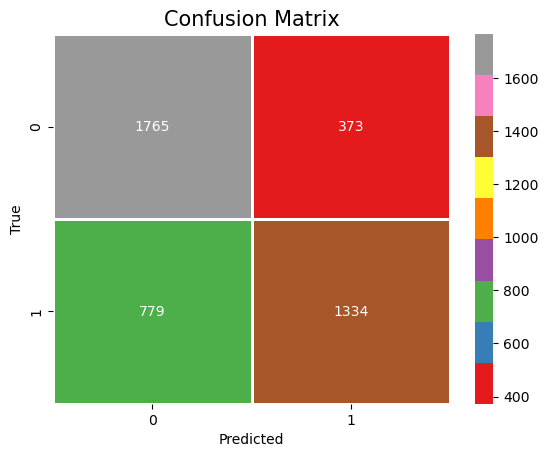

In [117]:
cm=confusion_matrix(Y_test,Y_pred)
#checkout recording of 16th jan
class_label = [0, 1]

df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set1',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [114]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[1909,  229],
       [ 362, 1751]], dtype=int64)

In [109]:
from sklearn.metrics import classification_report, confusion_matrix
ytest = np.array(Y_test)
print(classification_report(ytest,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      2138
           1       0.88      0.83      0.86      2113

    accuracy                           0.86      4251
   macro avg       0.86      0.86      0.86      4251
weighted avg       0.86      0.86      0.86      4251



In [115]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(X_train,Y_train)
Y_pred = log_regression.predict(X_test)

lg_accuracy= round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy
lg_accuracy


72.89999999999999